In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('Data\CustomerChurn.xlsx')

In [3]:
#Exploring the Data
df.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,LoyaltyID,Tenure,Monthly Charges
count,7043.000000,7043.000000,7043.000000
mean,550382.651001,32.371149,64.761692
std,260776.118690,24.559481,30.090047
min,100346.000000,0.000000,18.250000
25%,323604.500000,9.000000,35.500000
50%,548704.000000,29.000000,70.350000
75%,776869.000000,55.000000,89.850000
max,999912.000000,72.000000,118.750000


In [5]:
df.shape

(7043, 21)

In [6]:
df.info

<bound method DataFrame.info of       LoyaltyID Customer ID Senior Citizen Partner Dependents  Tenure  \
0        318537  7590-VHVEG             No     Yes         No       1   
1        152148  5575-GNVDE             No      No         No      34   
2        326527  3668-QPYBK             No      No         No       2   
3        845894  7795-CFOCW             No      No         No      45   
4        503388  9237-HQITU             No      No         No       2   
...         ...         ...            ...     ...        ...     ...   
7038     810338  6840-RESVB             No     Yes        Yes      24   
7039     230811  2234-XADUH             No     Yes        Yes      72   
7040     155157  4801-JZAZL             No     Yes        Yes      11   
7041     731782  8361-LTMKD            Yes     Yes         No       4   
7042     353947  3186-AJIEK             No      No         No      66   

     Phone Service    Multiple Lines Internet Service Online Security  ...  \
0            

In [7]:
df.dtypes

LoyaltyID              int64
Customer ID           object
Senior Citizen        object
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn                 object
dtype: object

In [8]:
df_dup = df[df.duplicated()]
df_dup

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn


In [9]:
df.nunique()
#Every Customer has a unique customer ID but there are som duplicate Loyalty IDs

LoyaltyID            7021
Customer ID          7043
Senior Citizen          2
Partner                 2
Dependents              2
Tenure                 73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn                   2
dtype: int64

In [10]:
df_dup_loy= df[df.duplicated(['LoyaltyID'], keep=False)]
df_dup_loy.sort_values(by='LoyaltyID', inplace=True)
df_dup_loy

<ipython-input-10-b6f173b0931d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup_loy.sort_values(by='LoyaltyID', inplace=True)


,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
4059,107296,3415-TAILE,No,Yes,Yes,2,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,65.70,134.35,Yes
4683,107296,9360-OMDZZ,No,No,No,24,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.10,2322.85,No
3831,157658,6946-LMSQS,Yes,Yes,No,25,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,One year,Yes,Electronic check,89.05,2177.45,Yes
2295,157658,2672-DZUOY,No,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.15,25.15,Yes
6052,181463,2516-XSJKX,No,Yes,Yes,41,Yes,No,DSL,Yes,...,No,Yes,Yes,Yes,Two year,No,Electronic check,78.45,3126.45,No
4724,181463,5073-RZGBK,No,Yes,Yes,50,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),80.05,4042.2,No
4147,217416,3836-FZSDJ,Yes,Yes,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.85,1901,No
6346,217416,9661-MHUMO,Yes,Yes,Yes,1,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.25,49.25,Yes
1103,223958,7722-CVFXN,No,Yes,Yes,54,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,105.20,5637.85,No
1898,223958,6689-TCZHQ,Yes,No,No,5,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,78.95,378.4,Yes


In [11]:
df['Tenure'].nunique()

73

In [12]:
df.isnull().sum()

LoyaltyID            0
Customer ID          0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [13]:
df['Payment Method'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [14]:
df['Multiple Lines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [15]:
df['Internet Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [16]:
df['Online Security'].unique()
#Check to see if this corresponds with Internet Service

array(['No', 'Yes', 'No internet service'], dtype=object)

In [17]:
df.loc[(df['Internet Service'] == 'No') & (df['Online Security'] != 'No internet service')]

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn


In [18]:
df['Online Backup'].unique()
#Check to see if this corresponds with Internet Service

array(['Yes', 'No', 'No internet service'], dtype=object)

In [19]:
df.loc[(df['Internet Service'] == 'No') & (df['Online Backup'] != 'No internet service')]

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn


In [20]:
df['Device Protection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
df.loc[(df['Internet Service'] == 'No') & (df['Device Protection'] != 'No internet service')]

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn


In [22]:
df['Tech Support'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
df.loc[(df['Internet Service'] == 'No') & (df['Tech Support'] != 'No internet service')]

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn


In [24]:
df['Streaming TV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [25]:
df.loc[(df['Internet Service'] == 'No') & (df['Streaming TV'] != 'No internet service')]

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn


In [26]:
df['Streaming Movies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
df.loc[(df['Internet Service'] == 'No') & (df['Streaming Movies'] != 'No internet service')]

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn


In [28]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [29]:
df['LoyaltyID']

0       318537
1       152148
2       326527
3       845894
4       503388
         ...  
7038    810338
7039    230811
7040    155157
7041    731782
7042    353947
Name: LoyaltyID, Length: 7043, dtype: int64

In [30]:
df_chi_test = df.drop(['LoyaltyID','Customer ID', 'Tenure','Monthly Charges', 'Total Charges' ], axis=1)

In [31]:
df_chi_test.head()

,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn
0,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [32]:
from sklearn.feature_selection import chi2
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt



In [33]:
churn_contract_cross = pd.crosstab(df_chi_test['Churn'], df_chi_test['Contract'])
stat, p, dof, expected = stats.chi2_contingency(churn_contract_cross)
print('stat=',stat,'\n', 'p=',p,'\n', 'dof=',dof)

stat= 1184.5965720837926 
 p= 5.863038300673391e-258 
 dof= 2


In [34]:
churn_phone_cross = pd.crosstab(df_chi_test['Churn'], df_chi_test['Phone Service'])
stat, p, dof, expected = stats.chi2_contingency(churn_phone_cross)
print('stat=',stat,'\n', 'p=',p,'\n', 'dof=',dof,'\n',expected)

stat= 0.9150329892546948 
 p= 0.3387825358066928 
 dof= 1 
 [[ 501.01774812 4672.98225188]
 [ 180.98225188 1688.01774812]]


In [35]:
churn_internet_cross = pd.crosstab(df_chi_test['Churn'], df_chi_test['Internet Service'])
stat, p, dof, expected = stats.chi2_contingency(churn_internet_cross)
print('stat=',stat,'\n', 'p=',p,'\n', 'dof=',dof)

stat= 732.309589667794 
 p= 9.571788222840544e-160 
 dof= 2


In [36]:
df_chi_test['Tech Help'] = df_chi_test['Tech Support'] + df_chi_test['Online Backup'] +df_chi_test['Online Security']
churn_TH_cross = pd.crosstab(df_chi_test['Churn'], df_chi_test['Tech Help'])
stat, p, dof, expected = stats.chi2_contingency(churn_TH_cross)
print('stat=',stat,'\n', 'p=',p,'\n', 'dof=',dof, '\n', expected)

stat= 1234.9491420638637 
 p= 2.6916512497728596e-261 
 dof= 8 
 [[1121.04557717 1258.42141133  354.82635241  617.08930853  321.03336646
   354.09172228  301.19835297  340.13374982  506.16015902]
 [ 404.95442283  454.57858867  128.17364759  222.91069147  115.96663354
   127.90827772  108.80164703  122.86625018  182.83984098]]


In [37]:
churn_dep_cross = pd.crosstab(df_chi_test['Churn'], df_chi_test['Dependents'])
stat, p, dof, expected = stats.chi2_contingency(churn_dep_cross)
print('stat=',stat,'\n', 'p=',p,'\n', 'dof=',dof, '\n', expected)

stat= 189.12924940423474 
 p= 4.9249216612154196e-43 
 dof= 1 
 [[3623.93042737 1550.06957263]
 [1309.06957263  559.93042737]]


In [38]:
df_chi_test['Family'] = df_chi_test['Partner'] + df_chi_test['Dependents']
churn_fam_cross = pd.crosstab(df_chi_test['Churn'], df_chi_test['Family'])
stat, p, dof, expected = stats.chi2_contingency(churn_fam_cross)
print('stat=',stat,'\n', 'p=',p,'\n', 'dof=',dof, '\n', expected)

stat= 241.61507905982785 
 p= 4.258343833789828e-52 
 dof= 3 
 [[2409.5868238   265.20147664 1214.34360358 1284.86809598]
 [ 870.4131762    95.79852336  438.65639642  464.13190402]]


In [39]:
df_corr = df[['Churn', 'Tenure']]
df_corr = pd.get_dummies(df_corr, drop_first = True)
df_corr.corr()

,Tenure,Churn_Yes
Tenure,1.000000,-0.352229
Churn_Yes,-0.352229,1.000000


In [40]:
r, p= stats.pearsonr(df_corr['Tenure'],df_corr['Churn_Yes'])
print('r=', r,'\n','p=', p)

r= -0.352228670113078 
 p= 7.999057960599509e-205


In [41]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df_model = df.drop(['LoyaltyID', 'Customer ID'], axis =1)

df_model

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [42]:
df_model[df_model['Tenure']==0]

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
488,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [43]:
df_model['Total Charges'] = np.where(df_model['Tenure']==0,'0', df_model['Total Charges'])

In [44]:
df_model.dtypes

Senior Citizen        object
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn                 object
dtype: object

In [45]:
df_model['Total Charges'] = df_model['Total Charges'].astype(int)

In [46]:
df_model['Monthly Charges'] = df_model['Monthly Charges'].astype(int)

In [47]:
from pandas.api.types import is_numeric_dtype 

X = df_model.drop('Churn', axis=1)
y = df_model.Churn

#https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html
def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

categorical_indicies = get_categorical_indicies(X)


def convert_cats(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        X[col] = X[col].astype('category')

convert_cats(X)

categorical_indicies

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [48]:
df_model.dtypes

Senior Citizen       object
Partner              object
Dependents           object
Tenure                int64
Phone Service        object
Multiple Lines       object
Internet Service     object
Online Security      object
Online Backup        object
Device Protection    object
Tech Support         object
Streaming TV         object
Streaming Movies     object
Contract             object
Paperless Billing    object
Payment Method       object
Monthly Charges       int32
Total Charges         int32
Churn                object
dtype: object

In [49]:
cats = []
for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
cat_indicies = []
for col in cats:
    cat_indicies.append(X.columns.get_loc(col))
cats

['Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [50]:
def convert_cats(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        X[col] = X[col].astype('category')
        
convert_cats(X)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=43)

train_data = cb.Pool(X_train, y_train, cat_features = categorical_indicies)
test_data = cb.Pool(X_test, y_test,cat_features = categorical_indicies)

train_data

In [52]:
CBmodel = cb.CatBoostClassifier(loss_function = 'Logloss')
grid={'learning_rate': [0.001, 0.01, 0.1],
     'depth':[3,5,8],
     'iterations': [10,15,20]}
CBmodel.grid_search(grid, train_data)

0:	learn: 0.6926272	test: 0.6926246	best: 0.6926246 (0)	total: 160ms	remaining: 1.44s
1:	learn: 0.6921454	test: 0.6921457	best: 0.6921457 (1)	total: 167ms	remaining: 669ms
2:	learn: 0.6917403	test: 0.6917313	best: 0.6917313 (2)	total: 176ms	remaining: 410ms
3:	learn: 0.6912438	test: 0.6912431	best: 0.6912431 (3)	total: 183ms	remaining: 274ms
4:	learn: 0.6907890	test: 0.6907724	best: 0.6907724 (4)	total: 192ms	remaining: 192ms
5:	learn: 0.6903167	test: 0.6902912	best: 0.6902912 (5)	total: 201ms	remaining: 134ms
6:	learn: 0.6898266	test: 0.6898110	best: 0.6898110 (6)	total: 210ms	remaining: 90.1ms
7:	learn: 0.6894038	test: 0.6893981	best: 0.6893981 (7)	total: 219ms	remaining: 54.8ms
8:	learn: 0.6888747	test: 0.6888885	best: 0.6888885 (8)	total: 227ms	remaining: 25.3ms
9:	learn: 0.6883713	test: 0.6883869	best: 0.6883869 (9)	total: 237ms	remaining: 0us

bestTest = 0.6883869273
bestIteration = 9

0:	loss: 0.6883869	best: 0.6883869 (0)	total: 261ms	remaining: 6.79s
0:	learn: 0.6879818	test: 

3:	learn: 0.6738627	test: 0.6740487	best: 0.6740487 (3)	total: 35.7ms	remaining: 143ms
4:	learn: 0.6693878	test: 0.6697530	best: 0.6697530 (4)	total: 46.8ms	remaining: 140ms
5:	learn: 0.6655191	test: 0.6659289	best: 0.6659289 (5)	total: 56.9ms	remaining: 133ms
6:	learn: 0.6609171	test: 0.6615513	best: 0.6615513 (6)	total: 66.4ms	remaining: 123ms
7:	learn: 0.6567110	test: 0.6574628	best: 0.6574628 (7)	total: 75.7ms	remaining: 114ms
8:	learn: 0.6527441	test: 0.6535660	best: 0.6535660 (8)	total: 83.4ms	remaining: 102ms
9:	learn: 0.6485719	test: 0.6494441	best: 0.6494441 (9)	total: 94.1ms	remaining: 94.1ms
10:	learn: 0.6446983	test: 0.6454687	best: 0.6454687 (10)	total: 103ms	remaining: 84.6ms
11:	learn: 0.6406638	test: 0.6412928	best: 0.6412928 (11)	total: 115ms	remaining: 76.8ms
12:	learn: 0.6368830	test: 0.6373486	best: 0.6373486 (12)	total: 126ms	remaining: 67.7ms
13:	learn: 0.6334044	test: 0.6340456	best: 0.6340456 (13)	total: 135ms	remaining: 57.8ms
14:	learn: 0.6297287	test: 0.63048

9:	learn: 0.6434231	test: 0.6440118	best: 0.6440118 (9)	total: 175ms	remaining: 87.5ms
10:	learn: 0.6390451	test: 0.6398113	best: 0.6398113 (10)	total: 191ms	remaining: 69.4ms
11:	learn: 0.6347987	test: 0.6355372	best: 0.6355372 (11)	total: 221ms	remaining: 55.2ms
12:	learn: 0.6307659	test: 0.6315102	best: 0.6315102 (12)	total: 252ms	remaining: 38.7ms
13:	learn: 0.6269448	test: 0.6277276	best: 0.6277276 (13)	total: 267ms	remaining: 19.1ms
14:	learn: 0.6231914	test: 0.6240208	best: 0.6240208 (14)	total: 289ms	remaining: 0us

bestTest = 0.6240207615
bestIteration = 14

13:	loss: 0.6240208	best: 0.4310655 (8)	total: 2.61s	remaining: 2.43s
0:	learn: 0.6399570	test: 0.6396177	best: 0.6396177 (0)	total: 12.2ms	remaining: 171ms
1:	learn: 0.6002103	test: 0.5995859	best: 0.5995859 (1)	total: 39ms	remaining: 254ms
2:	learn: 0.5675430	test: 0.5681743	best: 0.5681743 (2)	total: 51.1ms	remaining: 204ms
3:	learn: 0.5443143	test: 0.5460959	best: 0.5460959 (3)	total: 69.6ms	remaining: 191ms
4:	learn: 

4:	learn: 0.6645082	test: 0.6650697	best: 0.6650697 (4)	total: 114ms	remaining: 114ms
5:	learn: 0.6593270	test: 0.6602307	best: 0.6602307 (5)	total: 135ms	remaining: 90.2ms
6:	learn: 0.6551982	test: 0.6561238	best: 0.6561238 (6)	total: 148ms	remaining: 63.3ms
7:	learn: 0.6497072	test: 0.6507496	best: 0.6507496 (7)	total: 171ms	remaining: 42.9ms
8:	learn: 0.6446688	test: 0.6459802	best: 0.6459802 (8)	total: 200ms	remaining: 22.2ms
9:	learn: 0.6398495	test: 0.6412805	best: 0.6412805 (9)	total: 261ms	remaining: 0us

bestTest = 0.6412805227
bestIteration = 9

19:	loss: 0.6412805	best: 0.4260314 (17)	total: 4.46s	remaining: 1.56s
0:	learn: 0.6374989	test: 0.6382939	best: 0.6382939 (0)	total: 25.2ms	remaining: 227ms
1:	learn: 0.5922760	test: 0.5950731	best: 0.5950731 (1)	total: 53.6ms	remaining: 214ms
2:	learn: 0.5590162	test: 0.5624424	best: 0.5624424 (2)	total: 82.6ms	remaining: 193ms
3:	learn: 0.5325895	test: 0.5362074	best: 0.5362074 (3)	total: 111ms	remaining: 167ms
4:	learn: 0.5118946	

15:	learn: 0.6128848	test: 0.6146258	best: 0.6146258 (15)	total: 364ms	remaining: 91ms
16:	learn: 0.6086826	test: 0.6105348	best: 0.6105348 (16)	total: 398ms	remaining: 70.2ms
17:	learn: 0.6045423	test: 0.6064166	best: 0.6064166 (17)	total: 421ms	remaining: 46.8ms
18:	learn: 0.6006078	test: 0.6026008	best: 0.6026008 (18)	total: 444ms	remaining: 23.4ms
19:	learn: 0.5969310	test: 0.5989782	best: 0.5989782 (19)	total: 467ms	remaining: 0us

bestTest = 0.5989782387
bestIteration = 19

25:	loss: 0.5989782	best: 0.4260314 (17)	total: 6.97s	remaining: 268ms
0:	learn: 0.6374989	test: 0.6382939	best: 0.6382939 (0)	total: 20.7ms	remaining: 393ms
1:	learn: 0.5922760	test: 0.5950731	best: 0.5950731 (1)	total: 41.9ms	remaining: 377ms
2:	learn: 0.5590162	test: 0.5624424	best: 0.5624424 (2)	total: 64.6ms	remaining: 366ms
3:	learn: 0.5325895	test: 0.5362074	best: 0.5362074 (3)	total: 87.8ms	remaining: 351ms
4:	learn: 0.5118946	test: 0.5165758	best: 0.5165758 (4)	total: 114ms	remaining: 341ms
5:	learn: 

{'params': {'depth': 8, 'iterations': 20, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19],
              'test-Logloss-mean': [0.6398678043579524,
               0.5959658536301323,
               0.5621552309780263,
               0.5358170713997911,
               0.5146947638737068,
               0.4969199823686527,
               0.48493192158010395,
               0.47499469524984667,
               0.4660344031458294,
               0.45876237590709984,
               0.45238286226706287,
               0.4469565320303341,
               0.4424587170956331,
               0.4385929714224314,
  

In [53]:
CBmodel.get_params()

{'loss_function': 'Logloss',
 'depth': 8,
 'iterations': 20,
 'learning_rate': 0.1}

In [54]:
from sklearn.metrics import classification_report

predic = CBmodel.predict(X_test)
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1297
         Yes       0.66      0.48      0.55       464

    accuracy                           0.80      1761
   macro avg       0.75      0.69      0.71      1761
weighted avg       0.79      0.80      0.79      1761



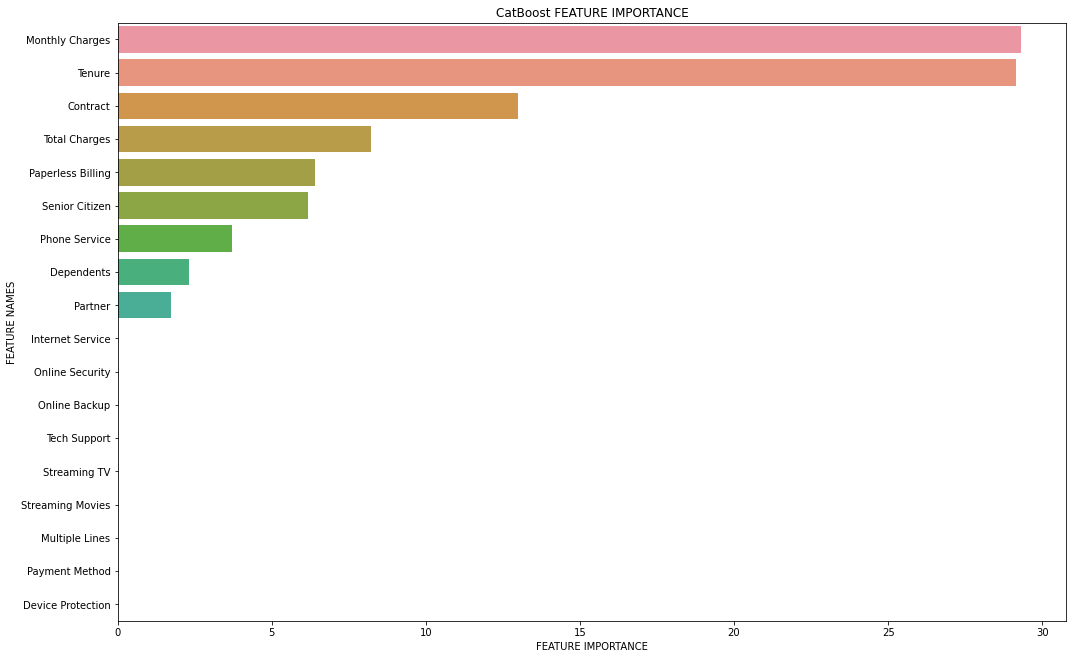

In [55]:
def plot_feature(important, name, model_type):
    
    feature_importance = np.array(important)
    feature_names = np.array(name)
    
    data={'feature_names': feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    plt.figure(figsize=(17,11))
    sns.barplot(x=fi_df['feature_importance'],y=fi_df['feature_names'])
    
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES') 

plot_feature(CBmodel.get_feature_importance(),X.columns,'CatBoost')

In [56]:
CBmodel.calc_feature_statistics(test_data, feature='Monthly Charges', plot=True, prediction_type='Class')

{'borders': array([ 19.5,  21.5,  24.5,  25.5,  28.5,  33.5,  38.5,  41.5,  42.5,
         49.5,  57.5,  61.5,  64.5,  67.5,  69.5,  70.5,  73.5,  74.5,
         77.5,  80.5,  81.5,  82.5,  84.5,  90.5,  91.5, 105.5],
       dtype=float32),
 'binarized_feature': array([23, 26, 14, ...,  1, 23, 19]),
 'mean_target': array([0.08536585, 0.07042254, 0.07407407, 0.06382979, 0.16666667,
        0.2777778 , 0.26923078, 0.10526316, 0.        , 0.3       ,
        0.3275862 , 0.13432837, 0.07407407, 0.1       , 0.34146342,
        0.5952381 , 0.29411766, 0.627907  , 0.36363637, 0.44339624,
        0.23809524, 0.25      , 0.4375    , 0.30128205, 0.2       ,
        0.36231884, 0.16504854], dtype=float32),
 'mean_weighted_target': array([], dtype=float32),
 'mean_prediction': array([0.        , 0.        , 0.07407407, 0.04255319, 0.        ,
        0.11111111, 0.15384616, 0.        , 0.        , 0.27272728,
        0.15517241, 0.05970149, 0.        , 0.03333334, 0.31707317,
        0.45238096, 0

In [57]:
CBmodel = cb.CatBoostClassifier(loss_function = 'Logloss')
grid={'learning_rate': [0.1, 0.2, 0.3],
     'depth':[3,5,8],
     'iterations': [10,15,20],
     'early_stopping_rounds': [8,13,18]}
CBmodel.grid_search(grid, train_data)

0:	learn: 0.6448823	test: 0.6446859	best: 0.6446859 (0)	total: 8.64ms	remaining: 77.8ms
1:	learn: 0.6093888	test: 0.6095701	best: 0.6095701 (1)	total: 18ms	remaining: 71.8ms
2:	learn: 0.5806179	test: 0.5813616	best: 0.5813616 (2)	total: 30.1ms	remaining: 70.3ms
3:	learn: 0.5587663	test: 0.5601330	best: 0.5601330 (3)	total: 40.8ms	remaining: 61.2ms
4:	learn: 0.5396818	test: 0.5418420	best: 0.5418420 (4)	total: 53.5ms	remaining: 53.5ms
5:	learn: 0.5225930	test: 0.5235758	best: 0.5235758 (5)	total: 61.8ms	remaining: 41.2ms
6:	learn: 0.5106353	test: 0.5110503	best: 0.5110503 (6)	total: 72.8ms	remaining: 31.2ms
7:	learn: 0.4937837	test: 0.4943460	best: 0.4943460 (7)	total: 82.3ms	remaining: 20.6ms
8:	learn: 0.4819823	test: 0.4825151	best: 0.4825151 (8)	total: 94.1ms	remaining: 10.5ms
9:	learn: 0.4720569	test: 0.4725473	best: 0.4725473 (9)	total: 105ms	remaining: 0us

bestTest = 0.4725473234
bestIteration = 9

0:	loss: 0.4725473	best: 0.4725473 (0)	total: 127ms	remaining: 10.1s
0:	learn: 0.6

2:	learn: 0.5146988	test: 0.5143879	best: 0.5143879 (2)	total: 24.8ms	remaining: 141ms
3:	learn: 0.4853761	test: 0.4845654	best: 0.4845654 (3)	total: 34.3ms	remaining: 137ms
4:	learn: 0.4706142	test: 0.4694785	best: 0.4694785 (4)	total: 42.8ms	remaining: 128ms
5:	learn: 0.4583451	test: 0.4573760	best: 0.4573760 (5)	total: 52.1ms	remaining: 122ms
6:	learn: 0.4469271	test: 0.4473982	best: 0.4473982 (6)	total: 60.8ms	remaining: 113ms
7:	learn: 0.4399663	test: 0.4408859	best: 0.4408859 (7)	total: 69.6ms	remaining: 104ms
8:	learn: 0.4327775	test: 0.4350996	best: 0.4350996 (8)	total: 79.9ms	remaining: 97.7ms
9:	learn: 0.4295874	test: 0.4320870	best: 0.4320870 (9)	total: 89.1ms	remaining: 89.1ms
10:	learn: 0.4269466	test: 0.4301416	best: 0.4301416 (10)	total: 99.7ms	remaining: 81.6ms
11:	learn: 0.4250025	test: 0.4279855	best: 0.4279855 (11)	total: 109ms	remaining: 72.6ms
12:	learn: 0.4220798	test: 0.4248154	best: 0.4248154 (12)	total: 118ms	remaining: 63.5ms
13:	learn: 0.4190246	test: 0.42198

13:	loss: 0.4210761	best: 0.4164872 (7)	total: 1.89s	remaining: 9.02s
0:	learn: 0.5702250	test: 0.5699970	best: 0.5699970 (0)	total: 8.21ms	remaining: 115ms
1:	learn: 0.5238121	test: 0.5226622	best: 0.5226622 (1)	total: 15.7ms	remaining: 102ms
2:	learn: 0.4743105	test: 0.4745711	best: 0.4745711 (2)	total: 25.2ms	remaining: 101ms
3:	learn: 0.4548831	test: 0.4552937	best: 0.4552937 (3)	total: 33.7ms	remaining: 92.8ms
4:	learn: 0.4460035	test: 0.4479809	best: 0.4479809 (4)	total: 43ms	remaining: 86ms
5:	learn: 0.4355560	test: 0.4399049	best: 0.4399049 (5)	total: 52ms	remaining: 78ms
6:	learn: 0.4306568	test: 0.4355806	best: 0.4355806 (6)	total: 60.6ms	remaining: 69.3ms
7:	learn: 0.4264519	test: 0.4307717	best: 0.4307717 (7)	total: 66.8ms	remaining: 58.5ms
8:	learn: 0.4228656	test: 0.4269763	best: 0.4269763 (8)	total: 76.1ms	remaining: 50.8ms
9:	learn: 0.4197491	test: 0.4238902	best: 0.4238902 (9)	total: 84.9ms	remaining: 42.4ms
10:	learn: 0.4172413	test: 0.4208661	best: 0.4208661 (10)	tot

9:	learn: 0.4197491	test: 0.4238902	best: 0.4238902 (9)	total: 89.7ms	remaining: 0us

bestTest = 0.4238902265
bestIteration = 9

20:	loss: 0.4238902	best: 0.4164872 (7)	total: 2.83s	remaining: 8.1s
0:	learn: 0.6448823	test: 0.6446859	best: 0.6446859 (0)	total: 7.64ms	remaining: 107ms
1:	learn: 0.6093888	test: 0.6095701	best: 0.6095701 (1)	total: 14.6ms	remaining: 95.1ms
2:	learn: 0.5806179	test: 0.5813616	best: 0.5813616 (2)	total: 23.4ms	remaining: 93.4ms
3:	learn: 0.5587663	test: 0.5601330	best: 0.5601330 (3)	total: 31.9ms	remaining: 87.8ms
4:	learn: 0.5396818	test: 0.5418420	best: 0.5418420 (4)	total: 40.6ms	remaining: 81.1ms
5:	learn: 0.5225930	test: 0.5235758	best: 0.5235758 (5)	total: 47.5ms	remaining: 71.3ms
6:	learn: 0.5106353	test: 0.5110503	best: 0.5110503 (6)	total: 57ms	remaining: 65.1ms
7:	learn: 0.4937837	test: 0.4943460	best: 0.4943460 (7)	total: 66.5ms	remaining: 58.2ms
8:	learn: 0.4819823	test: 0.4825151	best: 0.4825151 (8)	total: 75.4ms	remaining: 50.2ms
9:	learn: 0.4

1:	learn: 0.6002103	test: 0.5995859	best: 0.5995859 (1)	total: 42.1ms	remaining: 168ms
2:	learn: 0.5675430	test: 0.5681743	best: 0.5681743 (2)	total: 54.5ms	remaining: 127ms
3:	learn: 0.5443143	test: 0.5460959	best: 0.5460959 (3)	total: 73.4ms	remaining: 110ms
4:	learn: 0.5244186	test: 0.5263395	best: 0.5263395 (4)	total: 85.4ms	remaining: 85.4ms
5:	learn: 0.5083338	test: 0.5105211	best: 0.5105211 (5)	total: 99.2ms	remaining: 66.1ms
6:	learn: 0.4914742	test: 0.4940505	best: 0.4940505 (6)	total: 113ms	remaining: 48.6ms
7:	learn: 0.4783096	test: 0.4814878	best: 0.4814878 (7)	total: 135ms	remaining: 33.7ms
8:	learn: 0.4667439	test: 0.4691357	best: 0.4691357 (8)	total: 149ms	remaining: 16.5ms
9:	learn: 0.4567202	test: 0.4588943	best: 0.4588943 (9)	total: 166ms	remaining: 0us

bestTest = 0.4588942876
bestIteration = 9

27:	loss: 0.4588943	best: 0.4164872 (7)	total: 3.96s	remaining: 7.5s
0:	learn: 0.5951672	test: 0.5945059	best: 0.5945059 (0)	total: 11.8ms	remaining: 106ms
1:	learn: 0.540680

18:	learn: 0.4223731	test: 0.4275162	best: 0.4275162 (18)	total: 358ms	remaining: 18.8ms
19:	learn: 0.4200987	test: 0.4260314	best: 0.4260314 (19)	total: 389ms	remaining: 0us

bestTest = 0.4260313932
bestIteration = 19

33:	loss: 0.4260314	best: 0.4164872 (7)	total: 5.38s	remaining: 7.44s
0:	learn: 0.5951672	test: 0.5945059	best: 0.5945059 (0)	total: 12ms	remaining: 228ms
1:	learn: 0.5406807	test: 0.5375729	best: 0.5375729 (1)	total: 25.7ms	remaining: 231ms
2:	learn: 0.5062972	test: 0.5056910	best: 0.5056910 (2)	total: 37.9ms	remaining: 215ms
3:	learn: 0.4745448	test: 0.4747531	best: 0.4747531 (3)	total: 51.8ms	remaining: 207ms
4:	learn: 0.4591694	test: 0.4596880	best: 0.4596880 (4)	total: 61.4ms	remaining: 184ms
5:	learn: 0.4464834	test: 0.4476603	best: 0.4476603 (5)	total: 75ms	remaining: 175ms
6:	learn: 0.4374647	test: 0.4402354	best: 0.4402354 (6)	total: 92.9ms	remaining: 173ms
7:	learn: 0.4317989	test: 0.4357747	best: 0.4357747 (7)	total: 109ms	remaining: 163ms
8:	learn: 0.4263779

7:	learn: 0.4317989	test: 0.4357747	best: 0.4357747 (7)	total: 128ms	remaining: 112ms
8:	learn: 0.4263779	test: 0.4306419	best: 0.4306419 (8)	total: 140ms	remaining: 93.2ms
9:	learn: 0.4212054	test: 0.4266011	best: 0.4266011 (9)	total: 154ms	remaining: 76.9ms
10:	learn: 0.4177351	test: 0.4240562	best: 0.4240562 (10)	total: 169ms	remaining: 61.4ms
11:	learn: 0.4148036	test: 0.4228539	best: 0.4228539 (11)	total: 187ms	remaining: 46.7ms
12:	learn: 0.4130747	test: 0.4215524	best: 0.4215524 (12)	total: 212ms	remaining: 32.5ms
13:	learn: 0.4111917	test: 0.4205613	best: 0.4205613 (13)	total: 229ms	remaining: 16.4ms
14:	learn: 0.4080710	test: 0.4187592	best: 0.4187592 (14)	total: 246ms	remaining: 0us

bestTest = 0.4187591524
bestIteration = 14

40:	loss: 0.4187592	best: 0.4153160 (34)	total: 7.16s	remaining: 6.98s
0:	learn: 0.5583306	test: 0.5573730	best: 0.5573730 (0)	total: 16.9ms	remaining: 236ms
1:	learn: 0.5030536	test: 0.4991282	best: 0.4991282 (1)	total: 34.2ms	remaining: 222ms
2:	learn

7:	learn: 0.4783096	test: 0.4814878	best: 0.4814878 (7)	total: 152ms	remaining: 37.9ms
8:	learn: 0.4667439	test: 0.4691357	best: 0.4691357 (8)	total: 165ms	remaining: 18.4ms
9:	learn: 0.4567202	test: 0.4588943	best: 0.4588943 (9)	total: 182ms	remaining: 0us

bestTest = 0.4588942876
bestIteration = 9

45:	loss: 0.4588943	best: 0.4153160 (34)	total: 8.7s	remaining: 6.62s
0:	learn: 0.5951672	test: 0.5945059	best: 0.5945059 (0)	total: 11.9ms	remaining: 107ms
1:	learn: 0.5406807	test: 0.5375729	best: 0.5375729 (1)	total: 30.6ms	remaining: 122ms
2:	learn: 0.5062972	test: 0.5056910	best: 0.5056910 (2)	total: 42.9ms	remaining: 100ms
3:	learn: 0.4745448	test: 0.4747531	best: 0.4747531 (3)	total: 62.6ms	remaining: 93.8ms
4:	learn: 0.4591694	test: 0.4596880	best: 0.4596880 (4)	total: 72.1ms	remaining: 72.1ms
5:	learn: 0.4464834	test: 0.4476603	best: 0.4476603 (5)	total: 85.8ms	remaining: 57.2ms
6:	learn: 0.4374647	test: 0.4402354	best: 0.4402354 (6)	total: 116ms	remaining: 49.9ms
7:	learn: 0.4317

4:	learn: 0.4591694	test: 0.4596880	best: 0.4596880 (4)	total: 109ms	remaining: 327ms
5:	learn: 0.4464834	test: 0.4476603	best: 0.4476603 (5)	total: 127ms	remaining: 297ms
6:	learn: 0.4374647	test: 0.4402354	best: 0.4402354 (6)	total: 145ms	remaining: 269ms
7:	learn: 0.4317989	test: 0.4357747	best: 0.4357747 (7)	total: 167ms	remaining: 250ms
8:	learn: 0.4263779	test: 0.4306419	best: 0.4306419 (8)	total: 182ms	remaining: 223ms
9:	learn: 0.4212054	test: 0.4266011	best: 0.4266011 (9)	total: 200ms	remaining: 200ms
10:	learn: 0.4177351	test: 0.4240562	best: 0.4240562 (10)	total: 221ms	remaining: 181ms
11:	learn: 0.4148036	test: 0.4228539	best: 0.4228539 (11)	total: 248ms	remaining: 165ms
12:	learn: 0.4130747	test: 0.4215524	best: 0.4215524 (12)	total: 266ms	remaining: 143ms
13:	learn: 0.4111917	test: 0.4205613	best: 0.4205613 (13)	total: 283ms	remaining: 121ms
14:	learn: 0.4080710	test: 0.4187592	best: 0.4187592 (14)	total: 299ms	remaining: 99.5ms
15:	learn: 0.4060732	test: 0.4180236	best: 

13:	learn: 0.3827868	test: 0.4184617	best: 0.4184617 (13)	total: 408ms	remaining: 29.2ms
14:	learn: 0.3815741	test: 0.4178804	best: 0.4178804 (14)	total: 433ms	remaining: 0us

bestTest = 0.417880425
bestIteration = 14

58:	loss: 0.4178804	best: 0.4153160 (34)	total: 12.7s	remaining: 4.72s
0:	learn: 0.5525092	test: 0.5545777	best: 0.5545777 (0)	total: 23.5ms	remaining: 329ms
1:	learn: 0.4862679	test: 0.4901526	best: 0.4901526 (1)	total: 47ms	remaining: 306ms
2:	learn: 0.4579006	test: 0.4655610	best: 0.4655610 (2)	total: 78.5ms	remaining: 314ms
3:	learn: 0.4330720	test: 0.4436808	best: 0.4436808 (3)	total: 105ms	remaining: 289ms
4:	learn: 0.4202260	test: 0.4342257	best: 0.4342257 (4)	total: 131ms	remaining: 261ms
5:	learn: 0.4101641	test: 0.4251496	best: 0.4251496 (5)	total: 176ms	remaining: 264ms
6:	learn: 0.4036225	test: 0.4224048	best: 0.4224048 (6)	total: 206ms	remaining: 236ms
7:	learn: 0.3947604	test: 0.4189575	best: 0.4189575 (7)	total: 232ms	remaining: 203ms
8:	learn: 0.3879210	t

6:	learn: 0.4201330	test: 0.4312002	best: 0.4312002 (6)	total: 183ms	remaining: 78.4ms
7:	learn: 0.4123646	test: 0.4269855	best: 0.4269855 (7)	total: 208ms	remaining: 52ms
8:	learn: 0.4091769	test: 0.4234125	best: 0.4234125 (8)	total: 231ms	remaining: 25.6ms
9:	learn: 0.4040503	test: 0.4202986	best: 0.4202986 (9)	total: 256ms	remaining: 0us

bestTest = 0.4202985816
bestIteration = 9

64:	loss: 0.4202986	best: 0.4153160 (34)	total: 15.1s	remaining: 3.72s
0:	learn: 0.5525092	test: 0.5545777	best: 0.5545777 (0)	total: 26.8ms	remaining: 242ms
1:	learn: 0.4862679	test: 0.4901526	best: 0.4901526 (1)	total: 51.2ms	remaining: 205ms
2:	learn: 0.4579006	test: 0.4655610	best: 0.4655610 (2)	total: 81.4ms	remaining: 190ms
3:	learn: 0.4330720	test: 0.4436808	best: 0.4436808 (3)	total: 112ms	remaining: 169ms
4:	learn: 0.4202260	test: 0.4342257	best: 0.4342257 (4)	total: 139ms	remaining: 139ms
5:	learn: 0.4101641	test: 0.4251496	best: 0.4251496 (5)	total: 164ms	remaining: 110ms
6:	learn: 0.4036225	tes

14:	learn: 0.3815741	test: 0.4178804	best: 0.4178804 (14)	total: 366ms	remaining: 122ms
15:	learn: 0.3768235	test: 0.4187717	best: 0.4178804 (14)	total: 389ms	remaining: 97.2ms
16:	learn: 0.3714036	test: 0.4184282	best: 0.4178804 (14)	total: 412ms	remaining: 72.7ms
17:	learn: 0.3712160	test: 0.4184779	best: 0.4178804 (14)	total: 422ms	remaining: 46.9ms
18:	learn: 0.3700486	test: 0.4183210	best: 0.4178804 (14)	total: 444ms	remaining: 23.4ms
19:	learn: 0.3681881	test: 0.4175037	best: 0.4175037 (19)	total: 467ms	remaining: 0us

bestTest = 0.4175036776
bestIteration = 19

70:	loss: 0.4175037	best: 0.4153160 (34)	total: 17.5s	remaining: 2.46s
0:	learn: 0.5525092	test: 0.5545777	best: 0.5545777 (0)	total: 20.9ms	remaining: 397ms
1:	learn: 0.4862679	test: 0.4901526	best: 0.4901526 (1)	total: 42.5ms	remaining: 382ms
2:	learn: 0.4579006	test: 0.4655610	best: 0.4655610 (2)	total: 65.7ms	remaining: 372ms
3:	learn: 0.4330720	test: 0.4436808	best: 0.4436808 (3)	total: 89.8ms	remaining: 359ms
4:	lea

8:	learn: 0.3879210	test: 0.4163643	best: 0.4163643 (8)	total: 210ms	remaining: 140ms
9:	learn: 0.3788952	test: 0.4161134	best: 0.4161134 (9)	total: 234ms	remaining: 117ms
10:	learn: 0.3742877	test: 0.4165533	best: 0.4161134 (9)	total: 257ms	remaining: 93.5ms
11:	learn: 0.3737897	test: 0.4160710	best: 0.4160710 (11)	total: 265ms	remaining: 66.1ms
12:	learn: 0.3674760	test: 0.4169902	best: 0.4160710 (11)	total: 287ms	remaining: 44.2ms
13:	learn: 0.3662253	test: 0.4164913	best: 0.4160710 (11)	total: 305ms	remaining: 21.8ms
14:	learn: 0.3645810	test: 0.4164040	best: 0.4160710 (11)	total: 327ms	remaining: 0us

bestTest = 0.4160710303
bestIteration = 11

77:	loss: 0.4160710	best: 0.4153160 (34)	total: 19.8s	remaining: 762ms
0:	learn: 0.6374989	test: 0.6382939	best: 0.6382939 (0)	total: 21.1ms	remaining: 401ms
1:	learn: 0.5922760	test: 0.5950731	best: 0.5950731 (1)	total: 42.6ms	remaining: 384ms
2:	learn: 0.5590162	test: 0.5624424	best: 0.5624424 (2)	total: 75.4ms	remaining: 427ms
3:	learn: 

4:	learn: 0.4619869	test: 0.4697879	best: 0.4697879 (4)	total: 74.3ms	remaining: 223ms
5:	learn: 0.4506371	test: 0.4604514	best: 0.4604514 (5)	total: 88.4ms	remaining: 206ms
6:	learn: 0.4379306	test: 0.4489852	best: 0.4489852 (6)	total: 104ms	remaining: 193ms
7:	learn: 0.4274320	test: 0.4405170	best: 0.4405170 (7)	total: 117ms	remaining: 176ms
8:	learn: 0.4214183	test: 0.4353974	best: 0.4353974 (8)	total: 131ms	remaining: 160ms
9:	learn: 0.4162220	test: 0.4315485	best: 0.4315485 (9)	total: 144ms	remaining: 144ms
10:	learn: 0.4145386	test: 0.4302864	best: 0.4302864 (10)	total: 151ms	remaining: 123ms
11:	learn: 0.4106969	test: 0.4277360	best: 0.4277360 (11)	total: 164ms	remaining: 109ms
12:	learn: 0.4081011	test: 0.4261170	best: 0.4261170 (12)	total: 178ms	remaining: 95.8ms
13:	learn: 0.4065350	test: 0.4252405	best: 0.4252405 (13)	total: 191ms	remaining: 82ms
14:	learn: 0.4057896	test: 0.4246823	best: 0.4246823 (14)	total: 206ms	remaining: 68.5ms
15:	learn: 0.4043272	test: 0.4241013	best

{'params': {'depth': 5, 'od_wait': 8, 'iterations': 20, 'learning_rate': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19],
              'test-Logloss-mean': [0.6037742595565999,
               0.5455302916261004,
               0.5111615021951081,
               0.48302717320801136,
               0.46452581291893486,
               0.45373163231593416,
               0.44380195946540263,
               0.43690733537501075,
               0.432558712354194,
               0.42882145724367576,
               0.4263878549386116,
               0.4244070612768183,
               0.4225663631816046,
               0.42131

In [58]:
CBmodel.get_params()

{'loss_function': 'Logloss',
 'depth': 5,
 'od_wait': 8,
 'iterations': 20,
 'learning_rate': 0.2}

In [59]:
predic = CBmodel.predict(X_test)
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1297
         Yes       0.66      0.54      0.60       464

    accuracy                           0.81      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761



In [60]:
df_model_Tech = df_model[['Tech Support', 'Online Backup', 'Online Security', 'Churn']].copy()

In [61]:
X = df_model_Tech.drop('Churn', axis=1)
y = df_model_Tech.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=44, stratify=y)

train_data = cb.Pool(X_train, y_train, cat_features = [0,1,2])
test_data = cb.Pool(X_test, y_test, cat_features = [0,1,2])


In [62]:
CBmodel_tech = cb.CatBoostClassifier(loss_function = 'Logloss')
grid={'learning_rate': [0.001, 0.01, 0.1],
     'depth':[3,5,8],
     'iterations': [10,15,20]}
CBmodel_tech.grid_search(grid, train_data)

0:	learn: 0.6927293	test: 0.6927317	best: 0.6927317 (0)	total: 6.71ms	remaining: 60.4ms
1:	learn: 0.6923291	test: 0.6923324	best: 0.6923324 (1)	total: 13ms	remaining: 52ms
2:	learn: 0.6919297	test: 0.6919339	best: 0.6919339 (2)	total: 20.5ms	remaining: 47.8ms
3:	learn: 0.6915313	test: 0.6915364	best: 0.6915364 (3)	total: 27.1ms	remaining: 40.6ms
4:	learn: 0.6911338	test: 0.6911398	best: 0.6911398 (4)	total: 34ms	remaining: 34ms
5:	learn: 0.6907373	test: 0.6907441	best: 0.6907441 (5)	total: 39.8ms	remaining: 26.5ms
6:	learn: 0.6903416	test: 0.6903493	best: 0.6903493 (6)	total: 47.8ms	remaining: 20.5ms
7:	learn: 0.6899469	test: 0.6899555	best: 0.6899555 (7)	total: 54.6ms	remaining: 13.7ms
8:	learn: 0.6895530	test: 0.6895626	best: 0.6895626 (8)	total: 61.7ms	remaining: 6.86ms
9:	learn: 0.6891601	test: 0.6891706	best: 0.6891706 (9)	total: 68.2ms	remaining: 0us

bestTest = 0.6891705535
bestIteration = 9

0:	loss: 0.6891706	best: 0.6891706 (0)	total: 83.1ms	remaining: 2.16s
0:	learn: 0.68899

11:	learn: 0.6883770	test: 0.6883892	best: 0.6883892 (11)	total: 76.9ms	remaining: 51.3ms
12:	learn: 0.6879868	test: 0.6880000	best: 0.6880000 (12)	total: 83.4ms	remaining: 44.9ms
13:	learn: 0.6875975	test: 0.6876116	best: 0.6876116 (13)	total: 90.9ms	remaining: 38.9ms
14:	learn: 0.6872091	test: 0.6872241	best: 0.6872241 (14)	total: 97.5ms	remaining: 32.5ms
15:	learn: 0.6868216	test: 0.6868375	best: 0.6868375 (15)	total: 105ms	remaining: 26.2ms
16:	learn: 0.6864187	test: 0.6864370	best: 0.6864370 (16)	total: 114ms	remaining: 20.2ms
17:	learn: 0.6860330	test: 0.6860522	best: 0.6860522 (17)	total: 121ms	remaining: 13.5ms
18:	learn: 0.6856482	test: 0.6856683	best: 0.6856683 (18)	total: 128ms	remaining: 6.74ms
19:	learn: 0.6852644	test: 0.6852853	best: 0.6852853 (19)	total: 134ms	remaining: 0us

bestTest = 0.6852853458
bestIteration = 19

6:	loss: 0.6852853	best: 0.5034628 (5)	total: 739ms	remaining: 2.11s
0:	learn: 0.6889943	test: 0.6890180	best: 0.6890180 (0)	total: 6.67ms	remaining: 127

5:	learn: 0.6703994	test: 0.6704687	best: 0.6704687 (5)	total: 38.7ms	remaining: 58.1ms
6:	learn: 0.6669342	test: 0.6670133	best: 0.6670133 (6)	total: 45.1ms	remaining: 51.6ms
7:	learn: 0.6635494	test: 0.6636384	best: 0.6636384 (7)	total: 51.6ms	remaining: 45.1ms
8:	learn: 0.6602431	test: 0.6603421	best: 0.6603421 (8)	total: 57.9ms	remaining: 38.6ms
9:	learn: 0.6570136	test: 0.6571229	best: 0.6571229 (9)	total: 64.1ms	remaining: 32.1ms
10:	learn: 0.6538592	test: 0.6539789	best: 0.6539789 (10)	total: 70.2ms	remaining: 25.5ms
11:	learn: 0.6507783	test: 0.6509085	best: 0.6509085 (11)	total: 76.1ms	remaining: 19ms
12:	learn: 0.6477691	test: 0.6479101	best: 0.6479101 (12)	total: 82.2ms	remaining: 12.6ms
13:	learn: 0.6448301	test: 0.6449819	best: 0.6449819 (13)	total: 88.2ms	remaining: 6.3ms
14:	learn: 0.6419597	test: 0.6421224	best: 0.6421224 (14)	total: 94.3ms	remaining: 0us

bestTest = 0.6421223895
bestIteration = 14

13:	loss: 0.6421224	best: 0.4958578 (8)	total: 1.5s	remaining: 1.39s
0:

2:	learn: 0.6812950	test: 0.6813363	best: 0.6813363 (2)	total: 69.4ms	remaining: 162ms
3:	learn: 0.6775779	test: 0.6776284	best: 0.6776284 (3)	total: 92.2ms	remaining: 138ms
4:	learn: 0.6739467	test: 0.6740065	best: 0.6740065 (4)	total: 119ms	remaining: 119ms
5:	learn: 0.6703994	test: 0.6704687	best: 0.6704687 (5)	total: 129ms	remaining: 86.2ms
6:	learn: 0.6669342	test: 0.6670133	best: 0.6670133 (6)	total: 136ms	remaining: 58.3ms
7:	learn: 0.6635494	test: 0.6636384	best: 0.6636384 (7)	total: 153ms	remaining: 38.2ms
8:	learn: 0.6602431	test: 0.6603421	best: 0.6603421 (8)	total: 159ms	remaining: 17.7ms
9:	learn: 0.6570136	test: 0.6571229	best: 0.6571229 (9)	total: 165ms	remaining: 0us

bestTest = 0.65712291
bestIteration = 9

19:	loss: 0.6571229	best: 0.4954803 (17)	total: 2.33s	remaining: 816ms
0:	learn: 0.6541766	test: 0.6543795	best: 0.6543795 (0)	total: 6.83ms	remaining: 61.5ms
1:	learn: 0.6250337	test: 0.6253105	best: 0.6253105 (1)	total: 13.2ms	remaining: 52.8ms
2:	learn: 0.6022972

16:	learn: 0.6364183	test: 0.6366033	best: 0.6366033 (16)	total: 109ms	remaining: 19.3ms
17:	learn: 0.6337444	test: 0.6339407	best: 0.6339407 (17)	total: 116ms	remaining: 12.9ms
18:	learn: 0.6311330	test: 0.6313407	best: 0.6313407 (18)	total: 122ms	remaining: 6.44ms
19:	learn: 0.6285827	test: 0.6288019	best: 0.6288019 (19)	total: 129ms	remaining: 0us

bestTest = 0.6288018695
bestIteration = 19

25:	loss: 0.6288019	best: 0.4954803 (17)	total: 3.32s	remaining: 128ms
0:	learn: 0.6541766	test: 0.6543795	best: 0.6543795 (0)	total: 6.88ms	remaining: 131ms
1:	learn: 0.6250337	test: 0.6253105	best: 0.6253105 (1)	total: 13.2ms	remaining: 119ms
2:	learn: 0.6022972	test: 0.6026630	best: 0.6026630 (2)	total: 20.1ms	remaining: 114ms
3:	learn: 0.5845626	test: 0.5850263	best: 0.5850263 (3)	total: 26.4ms	remaining: 106ms
4:	learn: 0.5707185	test: 0.5712844	best: 0.5712844 (4)	total: 32.6ms	remaining: 97.8ms
5:	learn: 0.5598954	test: 0.5605645	best: 0.5605645 (5)	total: 40.1ms	remaining: 93.5ms
6:	lear

{'params': {'depth': 5, 'iterations': 20, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19],
              'test-Logloss-mean': [0.6555912471696791,
               0.626616309909439,
               0.6034666971286822,
               0.5862641670426604,
               0.5723456040375932,
               0.5613736245720627,
               0.5527152313843572,
               0.5443895678930093,
               0.5368775382493628,
               0.5289776068717739,
               0.5227364406216815,
               0.5179373693938497,
               0.5140092487805322,
               0.5104105215343374,
       

In [63]:
CBmodel_tech.get_params()



{'loss_function': 'Logloss',
 'depth': 5,
 'iterations': 20,
 'learning_rate': 0.1}

In [64]:
predic = CBmodel_tech.predict(X_test)
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

          No       0.73      1.00      0.85      1294
         Yes       0.00      0.00      0.00       467

    accuracy                           0.73      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.73      0.62      1761



C:\Users\gerry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [65]:
import  lightgbm as lgb 

X = df_model.drop('Churn', axis=1)
y = df_model.Churn



In [66]:
X = pd.get_dummies(X, drop_first=True)

print(X)

      Tenure  Monthly Charges  Total Charges  Senior Citizen_Yes  Partner_Yes  \
0          1               29             29                   0            1   
1         34               56           1889                   0            0   
2          2               53            108                   0            0   
3         45               42           1840                   0            0   
4          2               70            151                   0            0   
...      ...              ...            ...                 ...          ...   
7038      24               84           1990                   0            1   
7039      72              103           7362                   0            1   
7040      11               29            346                   0            1   
7041       4               74            306                   1            1   
7042      66              105           6844                   0            0   

      Dependents_Yes  Phone

In [67]:
X.dtypes

Tenure                                    int64
Monthly Charges                           int32
Total Charges                             int32
Senior Citizen_Yes                        uint8
Partner_Yes                               uint8
Dependents_Yes                            uint8
Phone Service_Yes                         uint8
Multiple Lines_No phone service           uint8
Multiple Lines_Yes                        uint8
Internet Service_Fiber optic              uint8
Internet Service_No                       uint8
Online Security_No internet service       uint8
Online Security_Yes                       uint8
Online Backup_No internet service         uint8
Online Backup_Yes                         uint8
Device Protection_No internet service     uint8
Device Protection_Yes                     uint8
Tech Support_No internet service          uint8
Tech Support_Yes                          uint8
Streaming TV_No internet service          uint8
Streaming TV_Yes                        

In [68]:
print(y)

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object


In [69]:
y=pd.get_dummies(y, drop_first=True)

In [70]:
print(y)

      Yes
0       0
1       0
2       1
3       0
4       1
...   ...
7038    0
7039    0
7040    0
7041    1
7042    0

[7043 rows x 1 columns]


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state= 7)

lgb_train= lgb.Dataset(X_train, label=y_train)

In [75]:
params = {'learning_rate': [0.2],
         'boosting_type': 'gbdt',
         'objective': 'binary',
         'metric': 'binary_logloss',
         'max_depth': 3}

LGBmodel= lgb.train(params, lgb_train, 100)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1385, number of negative: 3897
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262211 -> initscore=-1.034507
[LightGBM] [Info] Start training from score -1.034507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W